In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pathlib import Path
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [2]:
dataset_path = Path(r"../data/blue_waters_posix_with_paths_no_negative_outliers_no_time_witherrors.csv")

In [3]:
df_no_outliers = pd.read_csv(dataset_path)

In [4]:
len(df_no_outliers)

820701

In [5]:
df_no_outliers.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,exe,lustre,path,error,mean
0,1280,-1281,-1281,1807,0,0,2561,0,0,-1281,...,0,0,184,0.970498,213,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.190429,0.780068
1,168420,-5232,-5232,7505724,5401751,11345341,394840,0,1,-5232,...,0,0,0,147.540409,80,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.000000,NaN
2,62567,-1477,-1477,2300215,441912,1214829,280660,0,1,-1477,...,0,0,-1,24.994056,48,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.000000,NaN
3,2366,-2367,-2367,3342,0,0,4733,0,0,-2367,...,0,0,127,0.487127,394,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,-0.104674,0.591801
4,8709,-288,-288,1521073,6331589,2013343,28430,0,0,-288,...,0,0,-1,14389.735087,256,CCTM_v52_Linux2_x86_64intel,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.000000,NaN


In [6]:
df_no_outliers.exe.unique()

array(['Hsigma', 'SpEC', 'CCTM_v52_Linux2_x86_64intel', 'exec', 'mdtest',
       'ph.x', 'nek5000', 'ior', 'init_atmosphere_model',
       'ApplyObservers', 'volumeStats', 'pw.x', 'real.exe',
       'CutGridFlow_parallel', 'curvdns', 'enzo.exe', 'ppm_vortex',
       'quickpic_pipe.exe', 'bands.x', 'scheduler.x', 'ph5example',
       'harm3d', 'Radiate08', 'zeusmpi', 'Radiate10', 'vasp_ncl', 'vasp',
       'mctas_wrapper', 'runRSQSim', 'emod3d-mpi', 'coawstM', 'caliop',
       'vasp54withoutneb', 'run', 'lmp_new', 'wrf.exe',
       'iobubble_sicpr300d2p5nobub', 'vasp_std',
       'bubble_sicpr300d2p5nobub', 'iobubble_sicpr300d2p5',
       'bubble_sicpr300d2p5', 'iobubble_res32', 'bubble_sicpr300res32',
       'iobubble_res80', 'penc_comm_CAF.x', 'comm_penc_CAF.x',
       'lmp_xe6_kc_s', 'bubble_rcpr20h2816w', 'bubble_rcpr100h2016w',
       'bubble_rcpr100h2816w', 'bubble_rcpr20h2416w',
       'bubble_rcpr20h2016w', 'bubble_rcpr20h1716w',
       'bubble_rcpr100h1916w', 'bubble_rcpr50h281

Most used applications:
- SpEC: Standard Performance Evaluation Corporation, benchmark
- Flash4 physics simulation
- pw.x: Quantum Espresso
- VASP: atomic scale materials modelling, e.g. electronic structure calculations and quantum-mechanical molecular dynamics

In [7]:
df_no_outliers.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False).head(10)

exe
SpEC                           340845
CCTM_v52_Linux2_x86_64intel     85993
mosst_dynamo.x                  69537
vasp_gam                        65420
Spells                          40653
pw.x                            28629
enzo.exe                        27974
ApplyObservers                  27272
flash4                          24022
scheduler.x                     15058
Name: nprocs, dtype: int64

In [8]:
most_used_apps = df_no_outliers.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False)
len(most_used_apps.index)

906

([<matplotlib.patches.Wedge at 0x24724f95400>,
 [Text(1.052015202618404, 0.32134718523702477, 'SpEC'),
  Text(0.4962291440433025, 0.9817110759291919, 'CCTM_v52_Linux2_x86_64intel'),
  Text(-0.48256139063091247, 0.9885011402483864, 'mosst_dynamo.x'),
  Text(-1.0453725348821892, 0.3423393978407773, 'vasp_gam'),
  Text(-1.0467423008146652, -0.33812801671145376, 'Spells'),
  Text(0.30054618449791826, -1.0581455433841527, 'other')])

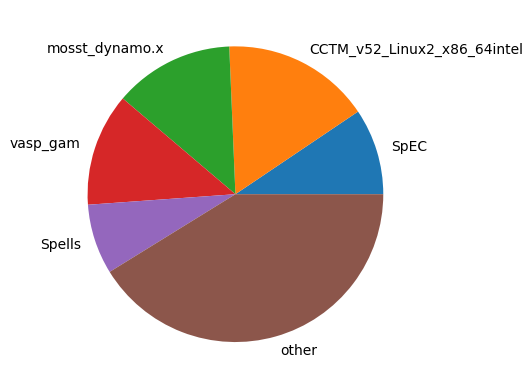

In [9]:
apps_to_plot = most_used_apps[0:5]
apps_to_plot["SpEC"] = 50000
apps_to_plot["other"] = most_used_apps[5:].sum()
apps_to_plot.name = "counts"
apps_to_plot.index
fig, ax = plt.subplots()
ax.pie(apps_to_plot,labels=apps_to_plot.index)

In [10]:
len(df_no_outliers["mean"].unique())

25056

Text(0, 0.5, 'number of sets')

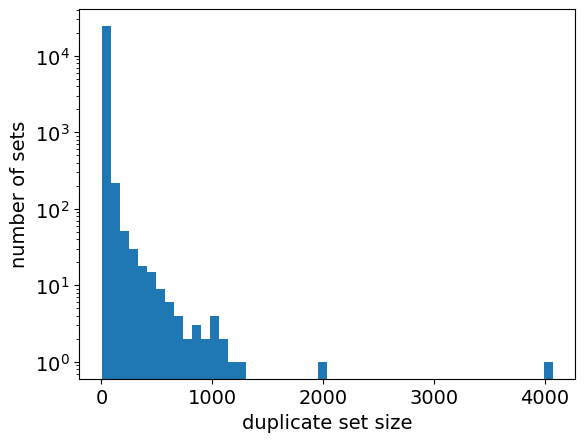

In [11]:
plt.rcParams.update({'font.size': 14})
mean_counts = pd.DataFrame(df_no_outliers["mean"]).groupby("mean",dropna=True)["mean"].count()
fig, ax = plt.subplots()
ax.hist(mean_counts.values,bins=50,log=True)
ax.set_xlabel("duplicate set size")
ax.set_ylabel("number of sets")

<Axes: xlabel='POSIX_TOTAL_TIME'>

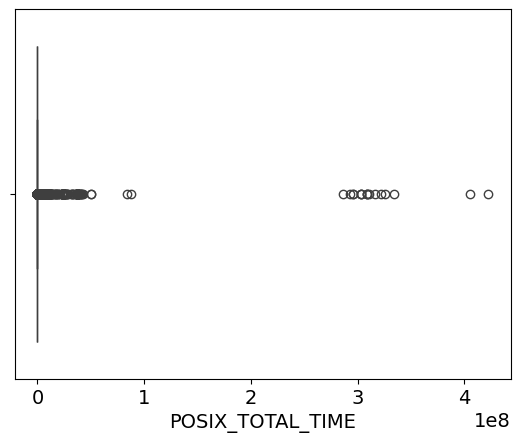

In [12]:
sns.boxplot(x=df_no_outliers.POSIX_TOTAL_TIME)

In [13]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
POSIX_OPENS,820701.0,2.733072e+04,8.899390e+05,0.000000e+00,215.000000,5543.00000,1.695400e+04,5.531094e+08
POSIX_FILENOS,820701.0,-1.680470e+03,2.904335e+04,-3.933124e+06,-994.000000,-288.00000,-2.000000e+01,-1.000000e+00
POSIX_DUPS,820701.0,-1.680470e+03,2.904335e+04,-3.933124e+06,-994.000000,-288.00000,-2.000000e+01,-1.000000e+00
POSIX_READS,820701.0,2.458676e+06,7.862124e+07,0.000000e+00,27281.000000,249379.00000,1.558014e+06,2.237846e+10
POSIX_WRITES,820701.0,4.534896e+06,7.409044e+07,0.000000e+00,10982.000000,285844.00000,3.015359e+06,1.920921e+10
...,...,...,...,...,...,...,...,...
POSIX_TOTAL_TIME,820701.0,1.582663e+04,1.513705e+06,1.096725e-05,7.952037,44.37264,1.821327e+02,4.223457e+08
nprocs,820701.0,1.673966e+02,2.328638e+03,1.000000e+00,16.000000,48.00000,6.400000e+01,4.298240e+05
lustre,820701.0,9.884440e-01,1.068759e-01,0.000000e+00,1.000000,1.00000,1.000000e+00,1.000000e+00
error,820701.0,2.060486e-15,3.249293e+03,-1.855642e+06,0.000000,0.00000,0.000000e+00,1.855642e+06


In [14]:
bytes_read_copy = df_no_outliers.POSIX_BYTES_READ.copy().where(df_no_outliers.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_no_outliers.POSIX_BYTES_WRITTEN.copy().where(df_no_outliers.POSIX_BYTES_WRITTEN > 0,0.1)

In [15]:
def plot_df_w_filter(df,filterexp,x_column,coord,color_data=bytes_read_copy,cmap="viridis"):
    sc = coord.scatter(x=df[filterexp][x_column],y=df[filterexp]["POSIX_TOTAL_TIME"], c=np.log10(color_data[filterexp]),cmap=cmap)
    coord.set_xscale("log")
    coord.set_yscale("log")
    coord.set_xlabel(x_column)
    coord.set_ylabel("POSIX_TOTAL_TIME")
    return sc

In [16]:
def plot_mosaic(filter_spec, filename):
    plt.rcParams.update({'font.size': 25})
    fig, axs = plt.subplots(nrows = 1, ncols=2, figsize=(30, 10))
    plt.subplots_adjust(wspace=0.26)
    sc_read = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0])
    sc_written = plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1],bytes_written_copy,"plasma")
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(sc_written, cax=cax, orientation='vertical',label="POSIX_BYTES_WRITTEN")
    plt.savefig(filename, format="png", bbox_inches="tight", dpi=300)
    plt.show()

In [17]:
most_used_apps[0:20]

exe
SpEC                           50000
CCTM_v52_Linux2_x86_64intel    85993
mosst_dynamo.x                 69537
vasp_gam                       65420
Spells                         40653
pw.x                           28629
enzo.exe                       27974
ApplyObservers                 27272
flash4                         24022
scheduler.x                    15058
lmp_new                        12817
ior                             7027
caliop                          6589
mdtest                          6563
sord-mO                         5240
PIOL-FFD                        5160
Hsigma                          3568
nwchem                          3339
nek5000                         3232
h_r_f                           2762
Name: nprocs, dtype: int64

In [18]:
df_no_outliers[df_no_outliers.exe == "Spells"].describe()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,error,mean
count,40653.000000,40653.000000,40653.000000,40653.000000,40653.000000,40653.000000,40653.000000,40653.0,40653.0,40653.000000,...,40653.0,40653.0,40653.0,40653.0,40653.000000,40653.000000,40653.0,40653.0,4.065300e+04,298.000000
mean,165.055592,-24.926328,-24.926328,1506.806238,1640.872974,2594.480998,471.116351,0.0,0.0,-24.926328,...,0.0,0.0,0.0,0.0,1.515140,1.204031,11.0,1.0,-1.826339e-20,0.272902
std,12.609351,3.425327,3.425327,166.567677,16.325438,130.403629,28.468367,0.0,0.0,3.425327,...,0.0,0.0,0.0,0.0,2.377667,17.688524,0.0,0.0,1.832569e-02,0.223059
min,44.000000,-26.000000,-26.000000,583.000000,0.000000,451.000000,110.000000,0.0,0.0,-26.000000,...,0.0,0.0,0.0,0.0,-1.000000,0.023552,11.0,1.0,-2.210036e+00,0.090912
25%,169.000000,-26.000000,-26.000000,1559.000000,1641.000000,2635.000000,480.000000,0.0,0.0,-26.000000,...,0.0,0.0,0.0,0.0,0.000000,0.229583,11.0,1.0,0.000000e+00,0.192476
50%,169.000000,-26.000000,-26.000000,1559.000000,1641.000000,2635.000000,480.000000,0.0,0.0,-26.000000,...,0.0,0.0,0.0,0.0,0.000000,0.328187,11.0,1.0,0.000000e+00,0.240618
75%,169.000000,-26.000000,-26.000000,1559.000000,1641.000000,2635.000000,480.000000,0.0,0.0,-26.000000,...,0.0,0.0,0.0,0.0,2.000000,0.484001,11.0,1.0,0.000000e+00,0.301162
max,169.000000,-13.000000,-13.000000,1569.000000,1711.000000,2635.000000,480.000000,0.0,0.0,-13.000000,...,0.0,0.0,0.0,0.0,10.000000,1360.678454,11.0,1.0,2.210036e+00,2.490881


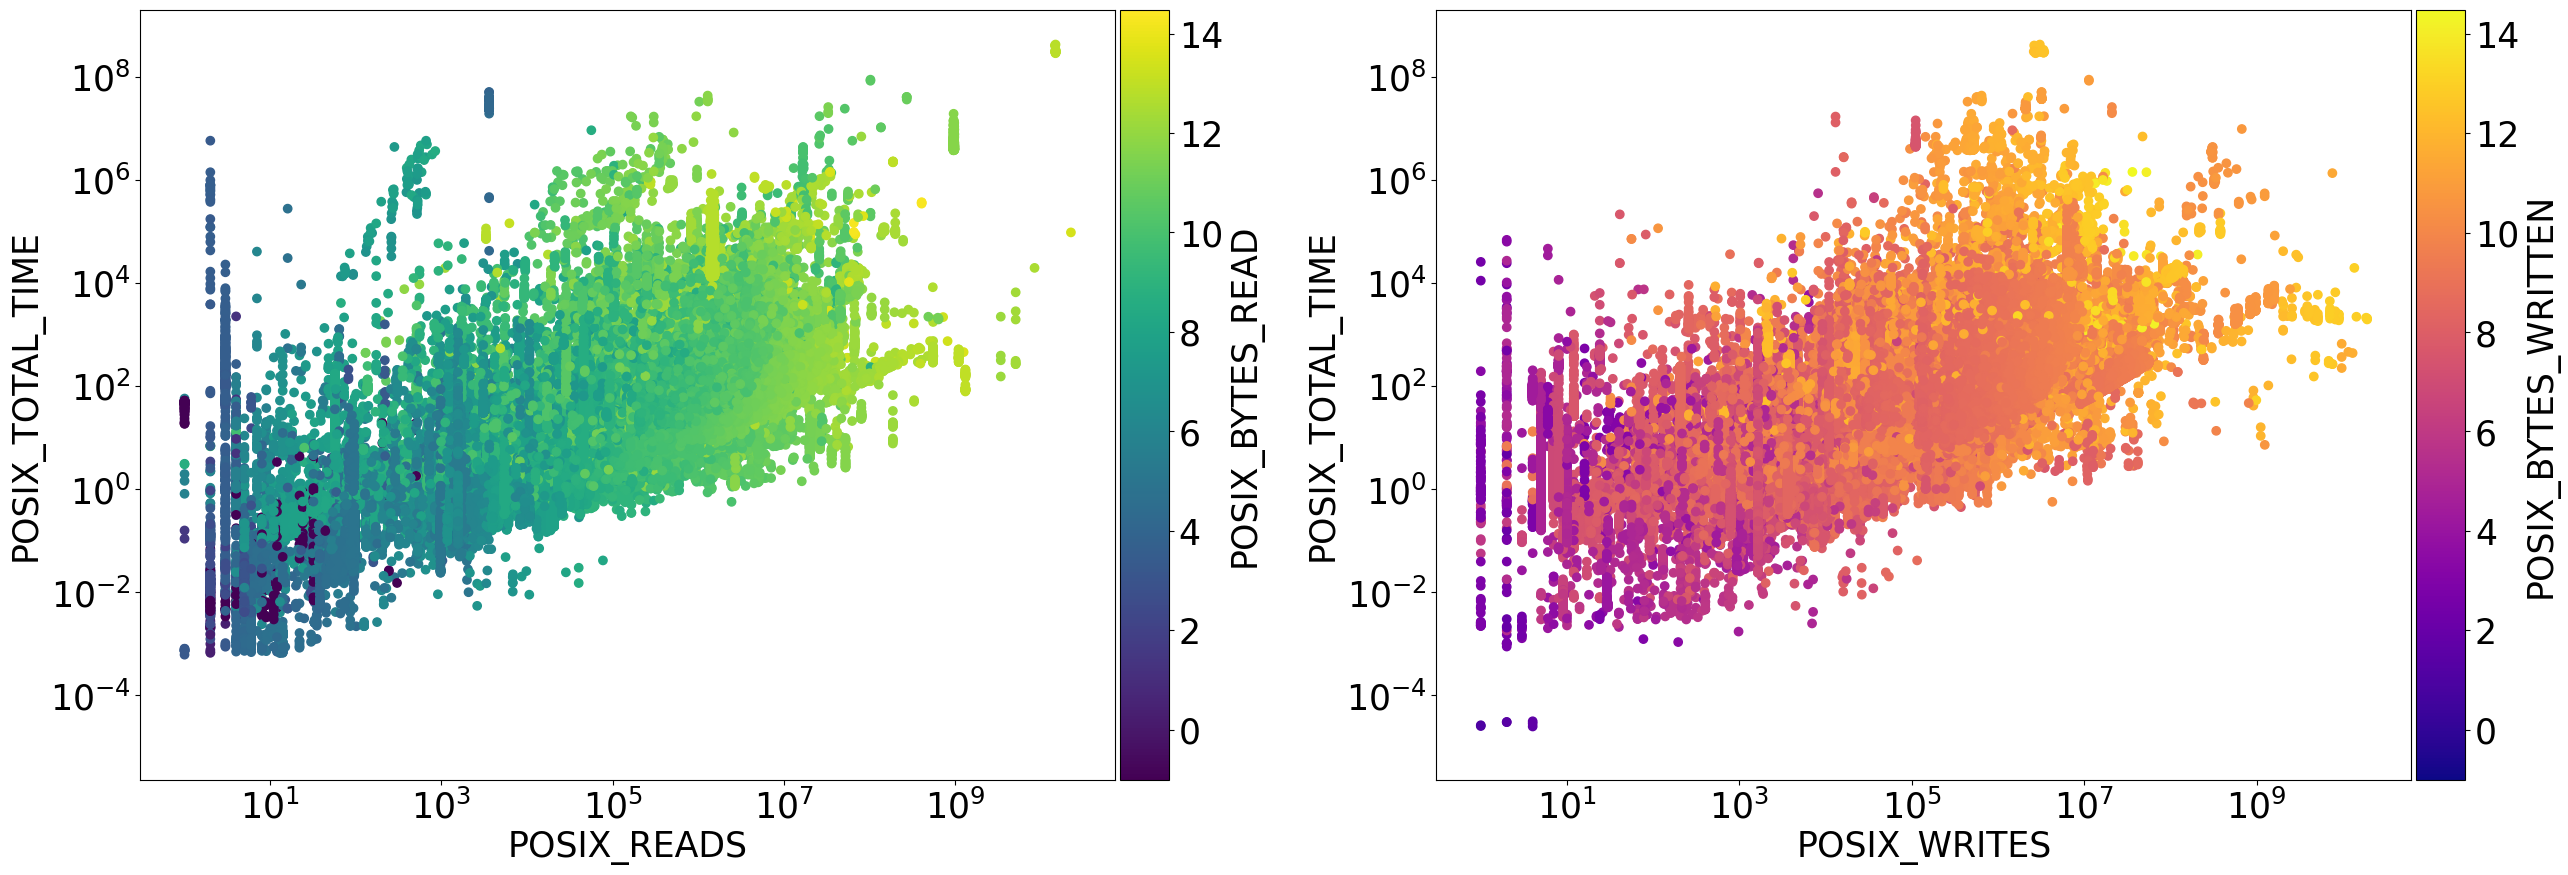

In [19]:
filter_spec = df_no_outliers.exe.isin(most_used_apps[0:5])
plot_mosaic((filter_spec == False) | (filter_spec == True), "../results/eda/Blue_Waters_EDA_no_IQR.png")

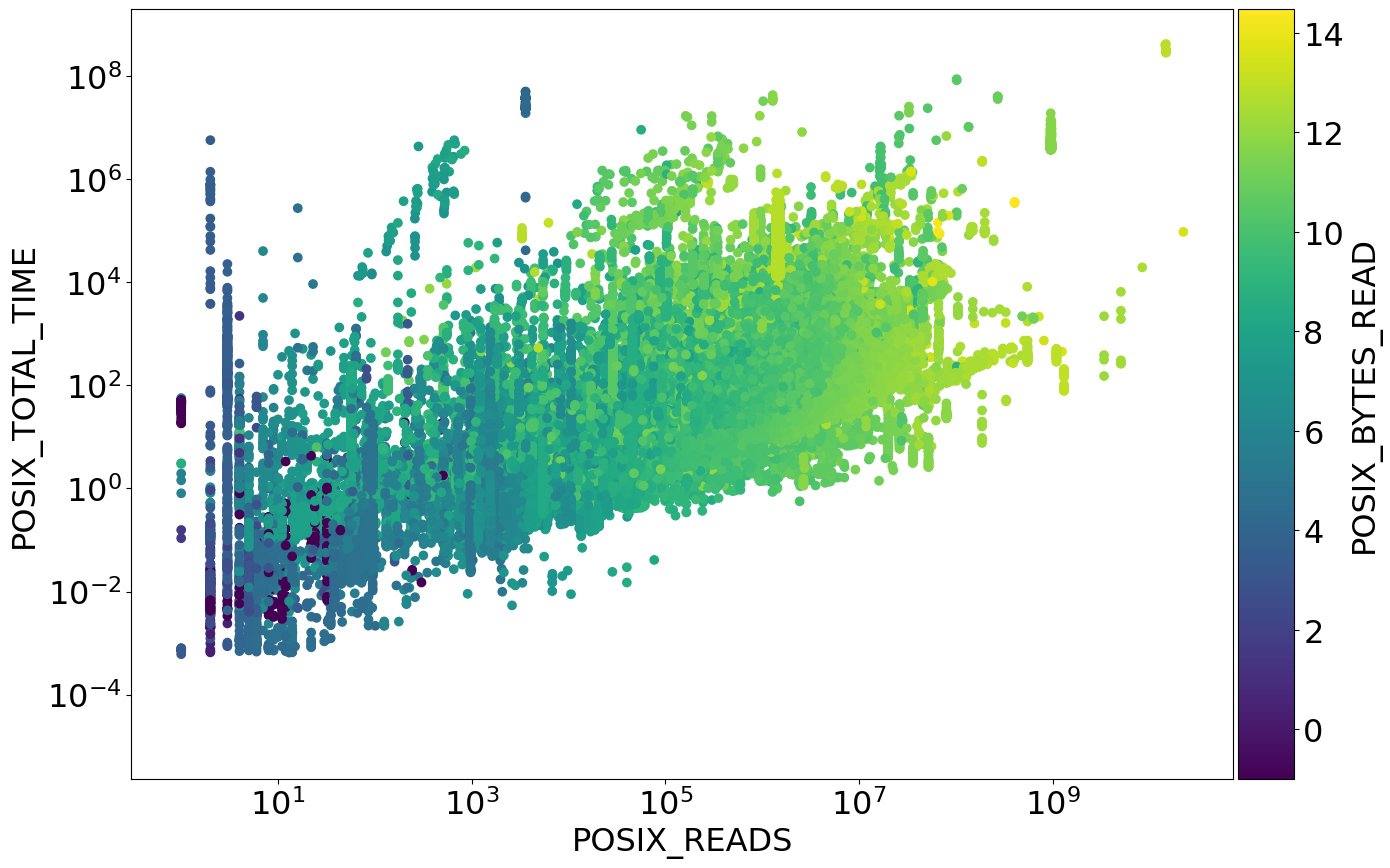

In [20]:
plt.rcParams.update({'font.size': 23})
filter_spec = df_no_outliers.exe.isin(most_used_apps[0:5])
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize=(15, 10))
plt.subplots_adjust(wspace=0.26)
sc_read = plot_df_w_filter(df_no_outliers,(filter_spec == False) | (filter_spec == True),"POSIX_READS",axs)
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(sc_read, cax=cax, orientation='vertical',label="POSIX_BYTES_READ")
plt.show()

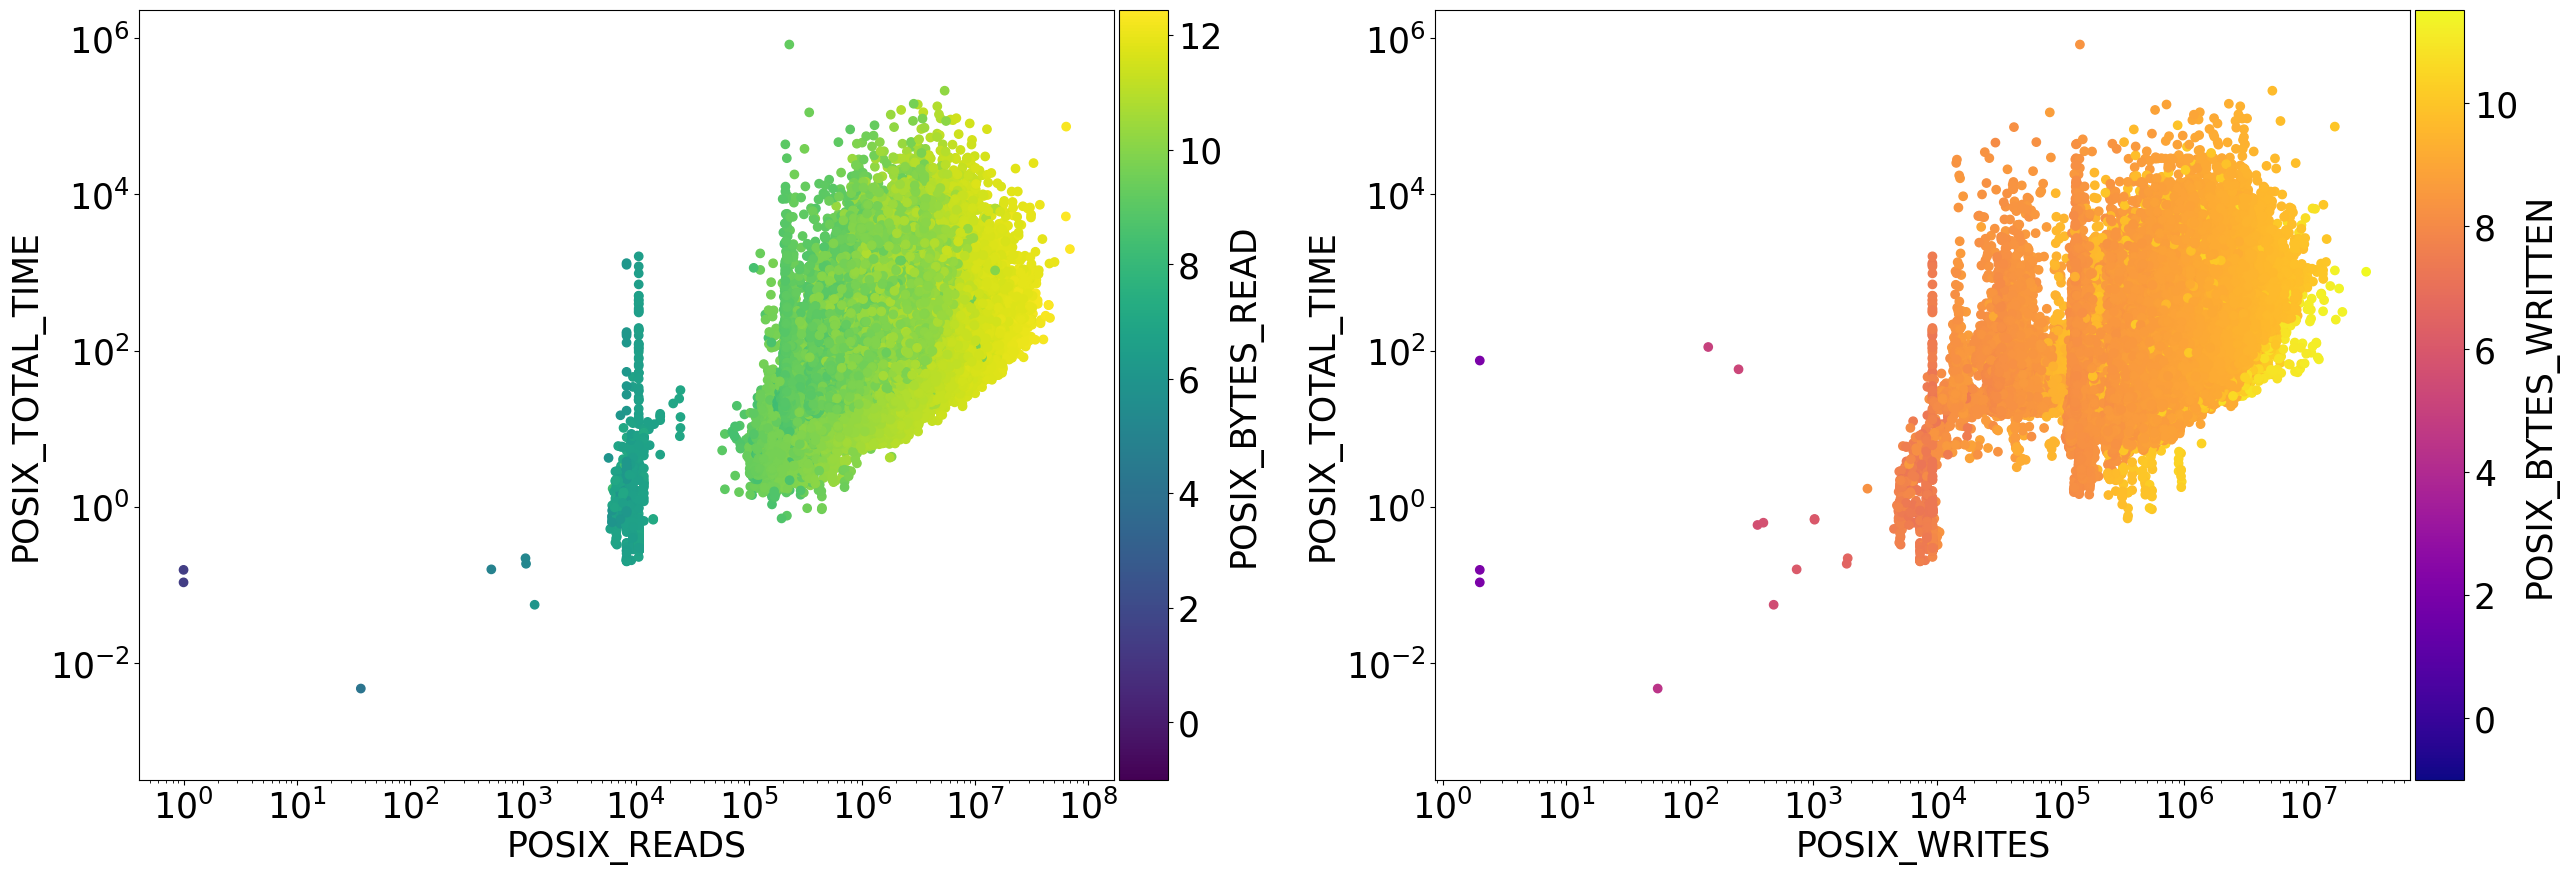

In [21]:
filter_spec = (df_no_outliers.exe == "SpEC")
plot_mosaic(filter_spec == True, "../results/eda/Blue_Waters_EDA_no_IQR_SpEC.png")

In at least 30% of the rows the rank is 0 or -1, possibly not known?

In [22]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == -1]) / len(df_no_outliers)

0.6054141520480663

In [23]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == 0]) / len(df_no_outliers)

0.281940682416617